In [1]:
from pathlib import Path

import numpy as np
import numpy.typing as npt
import skimage.transform
import skimage.util
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from tifffile import tifffile

from pybasic import compute_illum_profiles

working_size = 128
images_path = Path(r'images/Cell_culture/Uncorrected/DAPI')

In [2]:
def resize(a: npt.NDArray, shape: tuple[int, ...]) -> npt.NDArray:
    return skimage.transform.resize(a, shape, order=1, mode='symmetric')


# read in images
images = [tifffile.imread(p) for p in images_path.iterdir()]
images = [resize(im, (working_size, working_size)) for im in images]
images = np.stack(images)
images = skimage.util.img_as_float(images)

# With darkfield

In [11]:
flatfield, darkfield = compute_illum_profiles(images, compute_darkfield=True)

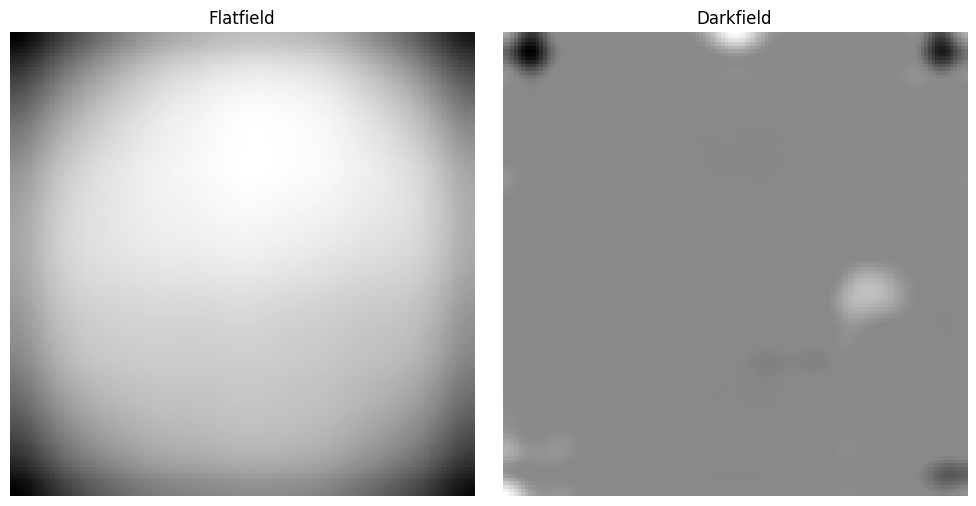

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig: Figure
axes: npt.NDArray[Axes]

axes[0].imshow(flatfield, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Flatfield')

axes[1].imshow(darkfield, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Darkfield')

fig.tight_layout()

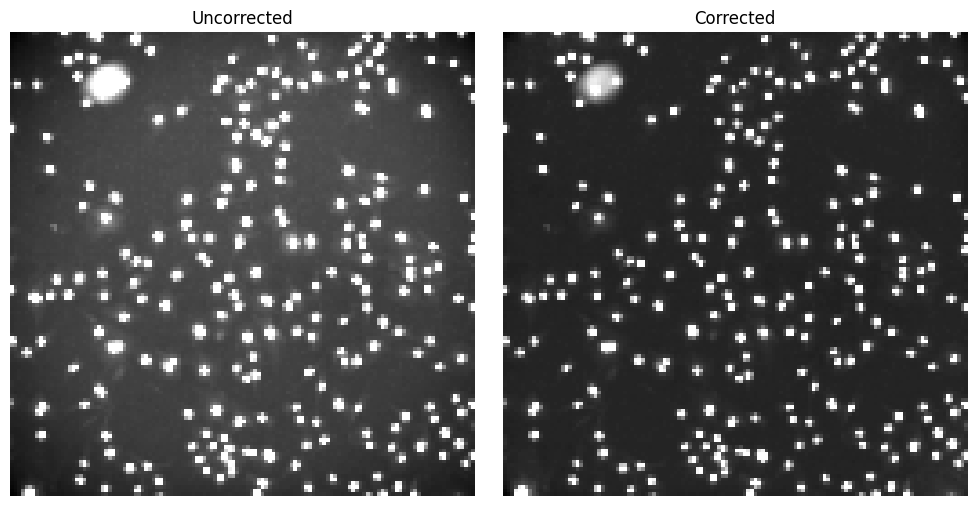

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig: Figure
axes: npt.NDArray[Axes]

image = images[0]
corrected = (image - darkfield) / flatfield

# blow out slightly so that the uneven illumination is visible
axes[0].imshow(image, vmax=0.005, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Uncorrected')

axes[1].imshow(corrected, vmax=0.005, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Corrected')

fig.tight_layout()

# Without darkfield

In [15]:
flatfield, _ = compute_illum_profiles(images, compute_darkfield=False)

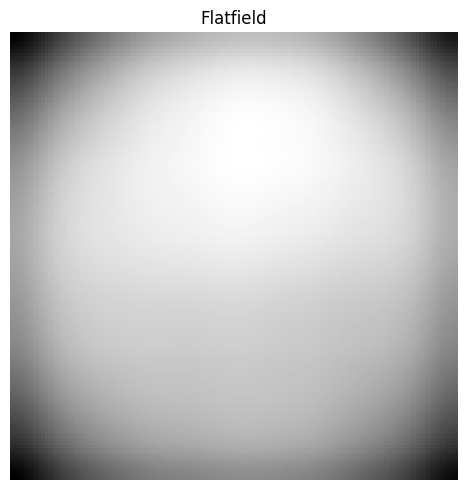

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
fig: Figure
ax: Axes

ax.imshow(flatfield, cmap='gray')
ax.axis('off')
ax.set_title('Flatfield')

fig.tight_layout()

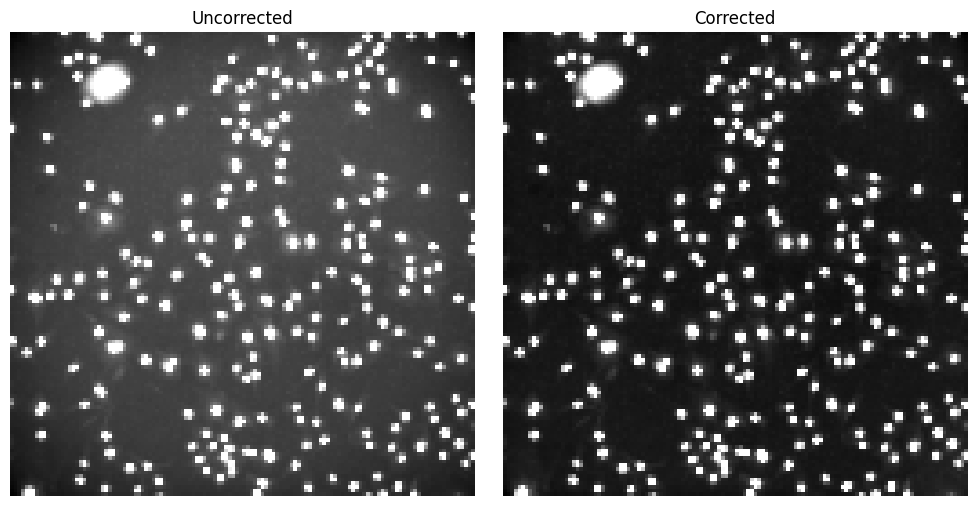

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig: Figure
axes: npt.NDArray[Axes]

image = images[0]
corrected = image / flatfield

# increase contrast so that the uneven illumination is visible
axes[0].imshow(image, cmap='gray', vmax=0.005)
axes[0].axis('off')
axes[0].set_title('Uncorrected')

axes[1].imshow(corrected, cmap='gray', vmax=0.005)
axes[1].axis('off')
axes[1].set_title('Corrected')

fig.tight_layout()